In [1]:
# 📘 Step 3: Product Recommendation Model (ML + NLP)
# File: model_training.ipynb

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load cleaned dataset
df = pd.read_csv("../data/clean_products.csv")
df.head()


,uniq_id,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,clean_description
0,PROD-1001,OakStone Plastic Wardrobe,OakStone,A stylish wardrobe made from premium plastic i...,23588.58,Wardrobe,https://picsum.photos/200?random=1,CraftedCo,115x186x62 cm,Germany,Plastic,Black,a stylish wardrobe made from premium plastic i...
1,PROD-1002,OakStone Plastic Wardrobe,OakStone,A stylish wardrobe made from premium plastic i...,8945.16,Wardrobe,https://picsum.photos/200?random=2,FurniMakers Ltd.,168x41x160 cm,Germany,Plastic,Blue,a stylish wardrobe made from premium plastic i...
2,PROD-1003,ComfyCasa Wood Wardrobe,ComfyCasa,A stylish wardrobe made from premium wood in b...,17321.49,Wardrobe,https://picsum.photos/200?random=3,UrbanWorks,94x134x152 cm,Italy,Wood,Beige,a stylish wardrobe made from premium wood in b...
3,PROD-1004,HomeLuxe Wood Wardrobe,HomeLuxe,A stylish wardrobe made from premium wood in w...,21140.06,Wardrobe,https://picsum.photos/200?random=4,CasaFurnish,64x66x153 cm,Italy,Wood,White,a stylish wardrobe made from premium wood in w...
4,PROD-1005,FurniCraft Glass Sofa,FurniCraft,A stylish sofa made from premium glass in grey...,14272.43,Sofa,https://picsum.photos/200?random=5,FurniMakers Ltd.,30x121x183 cm,India,Glass,Grey,a stylish sofa made from premium glass in grey...


In [2]:
# Convert product descriptions into numerical embeddings using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['clean_description'])

print("✅ TF-IDF embeddings created with shape:", X.shape)


✅ TF-IDF embeddings created with shape: (50, 27)


In [3]:
# Compute similarity between all product descriptions
similarity_matrix = cosine_similarity(X)

print("✅ Similarity matrix shape:", similarity_matrix.shape)


✅ Similarity matrix shape: (50, 50)


In [4]:
# Function to recommend top 5 similar products based on a given product title
def recommend_products(product_title, df, similarity_matrix, top_n=5):
    try:
        idx = df[df['title'].str.lower() == product_title.lower()].index[0]
    except IndexError:
        return "❌ Product not found. Try another title."

    # Get pairwise similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))
    # Sort by similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Top similar products excluding itself
    sim_scores = sim_scores[1:top_n+1]

    recommendations = df.iloc[[i[0] for i in sim_scores]][
        ['title', 'brand', 'price', 'categories', 'color', 'material', 'description']
    ]
    return recommendations

# Test
recommend_products("HomeLuxe Wood Chair", df, similarity_matrix)


,title,brand,price,categories,color,material,description
48,ComfyCasa Wood Chair,ComfyCasa,13185.40,Chair,Grey,Wood,A stylish chair made from premium wood in grey...
31,ComfyCasa Wood Table,ComfyCasa,18483.75,Table,Green,Wood,A stylish table made from premium wood in gree...
13,OakStone Wood Bookshelf,OakStone,29301.50,Bookshelf,Green,Wood,A stylish bookshelf made from premium wood in ...
47,OakStone Fabric Wardrobe,OakStone,12875.57,Wardrobe,Green,Fabric,A stylish wardrobe made from premium fabric in...
8,FurniCraft Fabric Bed,FurniCraft,9367.01,Bed,Green,Fabric,A stylish bed made from premium fabric in gree...


In [5]:
# Save vectorizer and similarity matrix
joblib.dump(vectorizer, "../app/models/tfidf_vectorizer.pkl")
joblib.dump(similarity_matrix, "../app/models/similarity_matrix.pkl")

print("✅ Model and embeddings saved successfully!")


✅ Model and embeddings saved successfully!


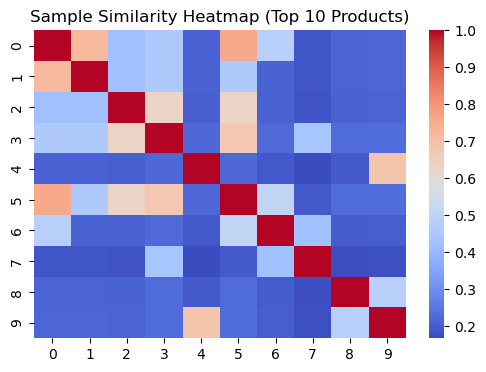

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(similarity_matrix[:10, :10], cmap="coolwarm")
plt.title("Sample Similarity Heatmap (Top 10 Products)")
plt.show()
